In [1]:
import pandas as pd
from typing import List, Tuple
import matplotlib.pyplot as plt

In [2]:
def calculate_transaction_costs(TA_treatment_high: bool, total_bargaining_time: int) -> Tuple[List[float], List[float]]:
    """
    Calculate the cumulative costs over time with a decay factor depending on the treatment andotre
    compute the differences between each consecutive cost.

    Args:
        TA_treatment_high (bool): Whether the treatment for Transactional Adjustment is high.
        total_bargaining_time (int): Total time in seconds for which the costs are to be calculated.

    Returns:
        Tuple[List[float], List[float]]: 
        - A list of cumulative costs at each second.
        - A list of differences between each second's cost and the next.
    """
    decay_factor = 0.99 if TA_treatment_high else 0.93

    cumulative_costs = [0] * total_bargaining_time
    current_costs = [0] * (total_bargaining_time)

    for t in range(1, total_bargaining_time + 1):
        if t % 2 == 0:  # Even seconds
            cost_t = 0.25 * decay_factor**(t/2)
            cumulative_costs[t-1] = cumulative_costs[t-2] + cost_t
        else:  # Odd seconds
            cumulative_costs[t-1] = cumulative_costs[t-2]

    for t in range(total_bargaining_time - 2):
        current_costs[t] = (cumulative_costs[t + 2] - cumulative_costs[t]) / 2

    return cumulative_costs, current_costs

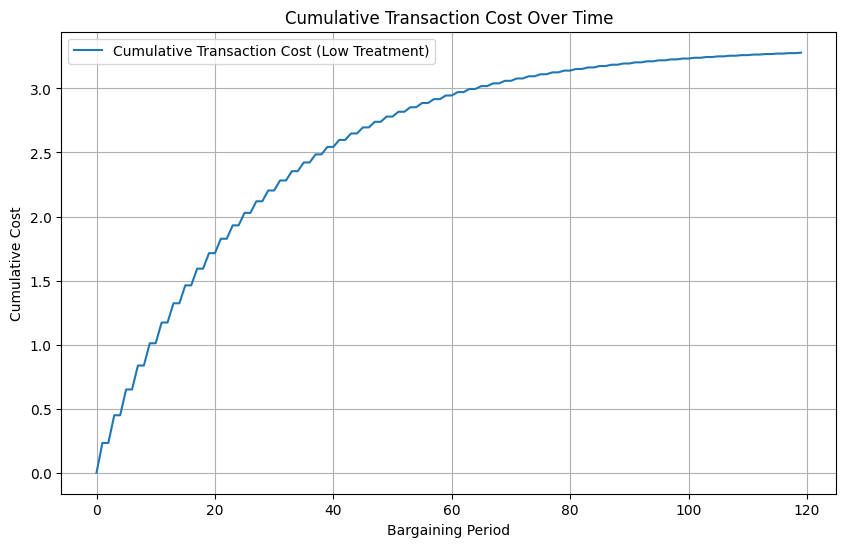

In [4]:
# Calculate the transaction costs for 120 seconds
total_bargaining_time = 120
cumulative_cost, _ = calculate_transaction_costs(TA_treatment_high=False, total_bargaining_time=total_bargaining_time)

# Plot the cumulative cost over time
plt.figure(figsize=(10, 6))
plt.plot(range(total_bargaining_time), cumulative_cost, label='Cumulative Transaction Cost (Low Treatment)')
plt.xlabel('Bargaining Period')
plt.ylabel('Cumulative Cost')
plt.title('Cumulative Transaction Cost Over Time')
plt.legend()
plt.grid(True)
plt.show()